# Trying the MNIST kaggle challenge

Challenge can be found here: https://www.kaggle.com/c/digit-recognizer/data

## Loading data & libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, Conv2D, Input, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tqdm import tqdm

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext tensorboard

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [5]:
IMG_SHAPE=(28, 28, 1)

def display_img_and_label(images, labels):
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5
    for i in range(1, columns*rows + 1):
        ax = fig.add_subplot(rows, columns, i)
        ax.title.set_text(f" - {labels[i]} - ")
        ax.axis('off')
        plt.imshow(images[i], cmap='Greys')
    plt.subplots_adjust(hspace=0.7)
    plt.show()

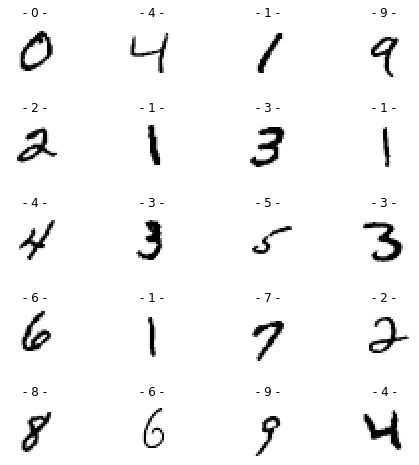

In [6]:
display_img_and_label(x_train, y_train)

In [7]:
# Shape input correctly
a, b, c = x_train.shape
X_TRAIN = np.reshape(x_train/255, (a, b, c, 1))

d, e, f = x_test.shape
X_TEST = np.reshape(x_test/255, (d, e, f, 1))

In [8]:
# Shape labels correctly
Y_TRAIN = np.zeros((len(y_train), 10))
for i in range(len(y_train)):
    Y_TRAIN[i][y_train[i]] = 1
    
Y_TEST = np.zeros((len(y_test), 10))
for j in range(len(y_test)):
    Y_TEST[j][y_test[j]] = 1

## Making a model

In [38]:
model = Sequential()

model.add(Input(shape=IMG_SHAPE))
model.add(Conv2D(32, (2,2), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (2,2), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (4,4), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))

In [39]:
model.compile(
    optimizer=Adam(lr=0.0015),
    loss="categorical_crossentropy",
    metrics=['accuracy']
) 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)         131200    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)             

In [40]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch=0)

model.fit(
    X_TRAIN, 
    Y_TRAIN, 
    epochs=15,
    batch_size=128, 
    callbacks=[tensorboard_callback],
    validation_data=(X_TEST, Y_TEST)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 39s 647us/sample - loss: 0.2085 - accuracy: 0.9347 - val_loss: 0.0433 - val_accuracy: 0.9852
Epoch 2/15
60000/60000 [==============================] - 43s 711us/sample - loss: 0.0566 - accuracy: 0.9829 - val_loss: 0.0281 - val_accuracy: 0.9904
Epoch 3/15
60000/60000 [==============================] - 39s 642us/sample - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0317 - val_accuracy: 0.9893
Epoch 4/15
60000/60000 [==============================] - 37s 624us/sample - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0276 - val_accuracy: 0.9907
Epoch 5/15
60000/60000 [==============================] - 39s 647us/sample - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0279 - val_accuracy: 0.9907
Epoch 6/15
60000/60000 [==============================] - 37s 619us/sample - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0260 - val_accuracy: 0.9925
Epoch 7/15
60000/60000 [====================

## Testing the model

In [19]:
df = pd.read_csv("./test.csv")
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
test_data = df.to_numpy()
n, _ = test_data.shape
TEST_IMAGES = np.reshape(test_data, (n, 28, 28))
TEST_DATA = np.reshape(TEST_IMAGES, (n, 28, 28, 1))/255

In [41]:
Y_TEST_DATA = model.predict(TEST_DATA)

In [42]:
clean_labels = [values.argmax() for values in Y_TEST_DATA]

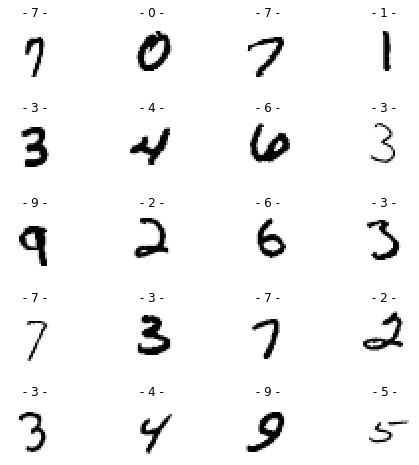

In [44]:
start = 1000
display_img_and_label(TEST_IMAGES[start:], clean_labels[start:])

## Debugging

[[9.9997711e-01 2.5494944e-13 1.3175316e-05 7.0870471e-12 1.6360385e-10
  3.2161010e-06 4.4769681e-06 8.6656693e-10 4.5777259e-07 1.5287387e-06]]
0


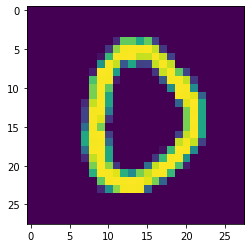

In [222]:
img_index = 19

# print(Y_TEST_DATA[img_index].argmax())
plt.imshow(TEST_IMAGES[img_index])

pred = model.predict(np.reshape(TEST_IMAGES[img_index]/255, (1, 28, 28, 1)))
print(pred)
print(pred.argmax())

## Exporting results

In [45]:
res_list = [(i+1, clean_labels[i]) for i in range(len(clean_labels))]
res = pd.DataFrame(res_list, columns=["ImageId", "Label"])

res.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [47]:
res.to_csv('./submission4.csv', index=False)